In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [21]:
data= pd.read_csv("Downloads/Google_train_Data.csv")

In [22]:
data.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [24]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [26]:
sc=MinMaxScaler(feature_range=(0,1))
trainData= sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [27]:
    X_train =[]
    y_train =[]
    
    for i in range (60,1149):  #60 :timestep // 11491: Length of data
        X_train.append(trainData[i-60:i,0])
        y_train.append(trainData[i,0])
        
    X_train,y_train = np.array(X_train),np.array(y_train)   

In [28]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the both side axis
X_train.shape

(1089, 60, 1)

In [29]:
model= Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

#here was the error
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam' , loss="mean_squared_error")

In [30]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 3s - loss: 0.0343
Epoch 2/20
35/35 - 4s - loss: 0.0102
Epoch 3/20
35/35 - 4s - loss: 0.0095
Epoch 4/20
35/35 - 3s - loss: 0.0107
Epoch 5/20
35/35 - 4s - loss: 0.0084
Epoch 6/20
35/35 - 4s - loss: 0.0088
Epoch 7/20
35/35 - 4s - loss: 0.0069
Epoch 8/20
35/35 - 4s - loss: 0.0072
Epoch 9/20
35/35 - 4s - loss: 0.0064
Epoch 10/20
35/35 - 4s - loss: 0.0058
Epoch 11/20
35/35 - 4s - loss: 0.0061
Epoch 12/20
35/35 - 4s - loss: 0.0056
Epoch 13/20
35/35 - 4s - loss: 0.0068
Epoch 14/20
35/35 - 4s - loss: 0.0064
Epoch 15/20
35/35 - 4s - loss: 0.0051
Epoch 16/20
35/35 - 4s - loss: 0.0053
Epoch 17/20
35/35 - 4s - loss: 0.0051
Epoch 18/20
35/35 - 4s - loss: 0.0051
Epoch 19/20
35/35 - 4s - loss: 0.0047
Epoch 20/20
35/35 - 4s - loss: 0.0061


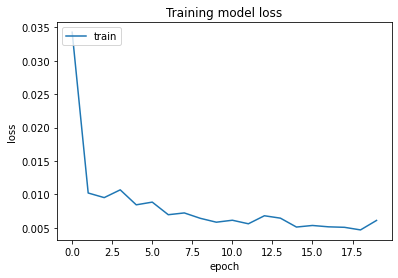

In [31]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [32]:
testData= pd.read_csv("Downloads/Google_test_Data.csv")


In [33]:
testData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-08-2018,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,14-08-2018,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,15-08-2018,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,16-08-2018,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,17-08-2018,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [34]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') 

testData = testData.dropna() 
testData = testData.iloc[:,4:5] 



y_test = testData.iloc[60:,0:].values 


inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)

In [35]:
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
    
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [40]:
#y_pred = model.predict(X_test)
y_pred = model.predict(X_test)

In [42]:
predicted_price = sc.inverse_transform(y_pred)

In [45]:
predicated_price.shape

(192, 1)

In [44]:
print(y_test.shape)

(192, 1)


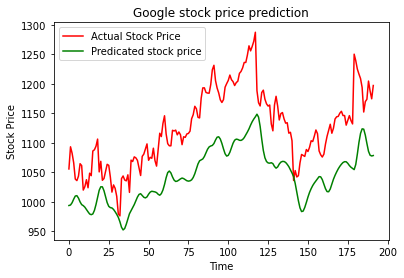

In [43]:
plt.plot(y_test, color= 'red', label= 'Actual Stock Price')
plt.plot(predicated_price, color='green', label='Predicated stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()